# **Context**


The dataset provided is from the 2022-2023 NBA regular season. This information contains all 672 NBA players as well as every major statistic for all the players. The goal is to perform a detailed analysis of this dataset and provide detailed information based on the players' stats per game in the regular season.We will break down the data to show the NBA's leaders in the major statistical categories. The major statistical categories include: points, rebounds, assists steals, and blocks. This information will allow us to determine which player averages the most points, rebounds, assists, blocks, and steals per game. Let's run an analysis.

# **Data Description:**
The detailed data dictionary is provided below:

* Player - The name of the player
* Pos - The basketball position of the player
* Age - The age of the player
* Tm - The team the player competes for
* G - How many games the player played
* GS - How many games the player started
* MP - How many minutes the player averages
* FG - Average of how many field goals the player make per game
* FGA - Average of how many field goals the player attempts per game
* FG% - The percentage of the player's made field goals based off of how many field goals the player attempts
* 3P - Amount of three pointers made per game
* 3PA - Amount of three pointers attmpted per game
* 3P% - The percentage of three pointers made based off of three pointers attempted
* 2P - Amount of two pointers made per game
* 2PA - Amount of two pointers attempted per game
* 2P% - Percentage of two pointers made based off of two pointers attempted
* eFG% - Effective field goal percentage which measures a player's shooting success from the field including both 2-point FG and 3-point FG.
* FT - Amount of free-throws made per game
* FTA - Amount of free-throws attempted per game
* FT% - Percentage of free-throws made based off of free-throws attempted
* ORB - Amount of offensive rebounds per game
* DRB - AMount of defensive rebounds per game
* TRB - Total rebounds per game combining both offensive and defensive
* AST - Amount of assists per game
* STL - Amount of steals per game
* BLK - Amount of blocks per game
* TOV - Amount of turnovers per game
* PF - Amount of personal fouls per game
* PTS - Amount of points per game

#Data Cleansing

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
data = pd.read_csv('/content/drive/MyDrive/Python Course/nba_data.csv', encoding= 'latin-1')

**Viewing the first 25 rows**

In [20]:
data.head(26)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23.0,TOR,55.0,12.0,20.7,3.6,7.3,0.485,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,Steven Adams,C,29.0,MEM,42.0,42.0,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25.0,MIA,75.0,75.0,34.6,8.0,14.9,0.540,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Ochai Agbaji,SG,22.0,UTA,59.0,22.0,20.5,2.8,6.5,0.427,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,Santi Aldama,PF,22.0,MEM,77.0,20.0,21.8,3.2,6.8,0.470,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
5,Nickeil Alexander-Walker,SG,24.0,TOT,59.0,3.0,15.0,2.2,5.0,0.444,...,0.667,0.3,1.5,1.7,1.8,0.5,0.4,0.9,1.5,6.2
6,Nickeil Alexander-Walker,SG,24.0,UTA,36.0,3.0,14.7,2.3,4.7,0.488,...,0.692,0.2,1.4,1.6,2.1,0.7,0.4,1.3,1.6,6.3
7,Nickeil Alexander-Walker,SG,24.0,MIN,23.0,0.0,15.5,2.1,5.4,0.384,...,0.619,0.3,1.5,1.8,1.4,0.3,0.3,0.4,1.3,5.9
8,Grayson Allen,SG,27.0,MIL,72.0,70.0,27.4,3.4,7.7,0.440,...,0.905,0.8,2.4,3.3,2.3,0.9,0.2,1.0,1.6,10.4
9,Jarrett Allen,C,24.0,CLE,68.0,68.0,32.6,5.9,9.2,0.644,...,0.733,3.3,6.5,9.8,1.7,0.8,1.2,1.4,2.3,14.3


In [21]:
data.tail(25)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
680,Jalen Williams,SG,21.0,OKC,75.0,62.0,30.3,5.5,10.6,0.521,...,0.812,1.1,3.4,4.5,3.3,1.4,0.5,1.6,2.5,14.1
681,Jaylin Williams,C,20.0,OKC,49.0,36.0,18.7,2.1,4.8,0.436,...,0.704,0.9,4.0,4.9,1.6,0.6,0.2,0.8,2.3,5.9
682,Jeenathan Williams,SG,23.0,POR,5.0,4.0,25.4,4.8,7.8,0.615,...,0.667,2.0,1.0,3.0,2.0,0.6,0.4,0.8,2.6,10.6
683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,Kenrich Williams,PF,28.0,OKC,53.0,10.0,22.8,3.4,6.5,0.517,...,0.436,1.8,3.1,4.9,2.0,0.8,0.3,0.6,2.1,8.0
685,Mark Williams,C,21.0,CHO,43.0,17.0,19.3,3.7,5.8,0.637,...,0.691,2.2,4.9,7.1,0.4,0.7,1.0,0.9,2.2,9.0
686,Patrick Williams,PF,21.0,CHI,82.0,65.0,28.3,3.8,8.3,0.464,...,0.857,1.0,3.0,4.0,1.2,0.9,0.9,1.2,1.8,10.2
687,Robert Williams,C,25.0,BOS,35.0,20.0,23.5,3.6,4.9,0.747,...,0.610,3.0,5.4,8.3,1.4,0.6,1.4,1.0,1.9,8.0
688,Vince Williams Jr.,SG,22.0,MEM,15.0,1.0,7.0,0.8,2.7,0.300,...,1.000,0.3,0.7,1.0,0.3,0.4,0.1,0.3,0.8,2.0
689,Ziaire Williams,SF,21.0,MEM,37.0,4.0,15.2,2.3,5.3,0.429,...,0.773,0.4,1.7,2.1,0.9,0.4,0.2,1.0,1.6,5.7


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  679 non-null    object 
 1   Pos     679 non-null    object 
 2   Age     679 non-null    float64
 3   Tm      679 non-null    object 
 4   G       679 non-null    float64
 5   GS      679 non-null    float64
 6   MP      679 non-null    float64
 7   FG      679 non-null    float64
 8   FGA     679 non-null    float64
 9   FG%     676 non-null    float64
 10  3P      679 non-null    float64
 11  3PA     679 non-null    float64
 12  3P%     655 non-null    float64
 13  2P      679 non-null    float64
 14  2PA     679 non-null    float64
 15  2P%     672 non-null    float64
 16  eFG%    676 non-null    float64
 17  FT      679 non-null    float64
 18  FTA     679 non-null    float64
 19  FT%     642 non-null    float64
 20  ORB     679 non-null    float64
 21  DRB     679 non-null    float64
 22  TR



*   There are only two data dtypes in the data which are **floats** and **objects**
*   There are 3 columns that are considered **floats** but should be **int**. Lets change that



In [23]:
#Here I am changing the data type to int64 to
#remove the decimals where they are not needed
data['Age'] = data['Age'].astype('Int64')
data['G'] = data['G'].astype('Int64')
data['GS'] = data['GS'].astype('Int64')

Run the data again to make sure that the data types have changed

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  679 non-null    object 
 1   Pos     679 non-null    object 
 2   Age     679 non-null    Int64  
 3   Tm      679 non-null    object 
 4   G       679 non-null    Int64  
 5   GS      679 non-null    Int64  
 6   MP      679 non-null    float64
 7   FG      679 non-null    float64
 8   FGA     679 non-null    float64
 9   FG%     676 non-null    float64
 10  3P      679 non-null    float64
 11  3PA     679 non-null    float64
 12  3P%     655 non-null    float64
 13  2P      679 non-null    float64
 14  2PA     679 non-null    float64
 15  2P%     672 non-null    float64
 16  eFG%    676 non-null    float64
 17  FT      679 non-null    float64
 18  FTA     679 non-null    float64
 19  FT%     642 non-null    float64
 20  ORB     679 non-null    float64
 21  DRB     679 non-null    float64
 22  TR

* I now have 26 floats, 3 objects, and 3 Int64 data types.
* The code ran successfully.

In [25]:
data.duplicated().sum()

25

In [26]:
data.drop_duplicates(inplace=True)

data.reset_index(drop=True,inplace=True)

We will check the data again to ensure that all duplicates were dropped.

In [27]:
data.duplicated().sum()

0

Some players are still showing up more than once in the data because they played for different teams that same season. This is ok considering the data is giving separate statistics for each team the player competed for.

In [28]:
data.isnull().sum()

Player     1
Pos        1
Age        1
Tm         1
G          1
GS         1
MP         1
FG         1
FGA        1
FG%        4
3P         1
3PA        1
3P%       25
2P         1
2PA        1
2P%        8
eFG%       4
FT         1
FTA        1
FT%       38
ORB        1
DRB        1
TRB        1
AST        1
STL        1
BLK        1
TOV        1
PF         1
PTS        1
dtype: int64

As you can see we have missing values in all of the columns. We will drop those so there are no desrepancies in the data

In [29]:
#This will drop the missing values in the data
data.dropna(inplace=True)

Lets run the code again to make sure the missing values are all gone.

In [30]:
data.isnull().sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,624.0,26.110577,4.367796,19.0,23.0,25.0,29.0,42.0
G,624.0,45.935897,23.400808,1.0,25.0,48.0,67.0,83.0
GS,624.0,21.358974,26.132444,0.0,1.0,7.0,40.0,83.0
MP,624.0,20.347756,8.968985,2.8,13.175,19.45,28.3,38.2
FG,624.0,3.429647,2.349878,0.2,1.7,2.7,4.5,11.2
FGA,624.0,7.31266,4.775333,0.5,3.6,6.0,9.725,22.2
FG%,624.0,0.465397,0.08389,0.158,0.418,0.4545,0.5,0.9
3P,624.0,1.066827,0.859227,0.0,0.4,0.9,1.6,4.9
3PA,624.0,2.966987,2.196912,0.0,1.3,2.5,4.4,11.4
3P%,624.0,0.333359,0.120502,0.0,0.302,0.35,0.38925,1.0


* The average age for all of the NBA players in the 2022-2023 season is 26yrs old.
* The youngest NBA player is 19yrs old, while the oldest NBA player is 42yrs old.
* On average, 672 NBA players average about 9ppg on approximately 7FGA per game.

#NBA's Statistical Leaders

In [32]:
#This is a list of all players grouped by their respective teams.
team_players = data.groupby(['Tm', 'Player','Pos'])
team_players.first()

Age   G  GS    MP   FG   FGA    FG%   3P  3PA  \
Tm  Player             Pos                                                  
ATL AJ Griffin         SF    19  72  12  19.5  3.4   7.4  0.465  1.4  3.6   
    Aaron Holiday      PG    26  63   6  13.4  1.5   3.5  0.418  0.6  1.4   
    Bogdan BogdanoviÄ SG    30  54   9  27.9  5.1  11.3  0.447  2.7  6.7   
    Bruno Fernando     C     24   8   0   5.1  1.4   2.4  0.579  0.0  0.4   
    Clint Capela       C     28  65  63  26.6  5.4   8.2  0.653  0.0  0.0   
...                         ...  ..  ..   ...  ...   ...    ...  ...  ...   
WAS Quenton Jackson    PG    24   9   0  15.0  2.1   4.7  0.452  0.1  1.3   
    Rui Hachimura      PF    24  30   0  24.3  5.3  10.8  0.488  1.0  3.0   
    Taj Gibson         C     37  49   2   9.8  1.3   2.6  0.520  0.2  0.5   
    Will Barton        SG    32  40   0  19.6  2.8   7.1  0.386  1.3  3.5   
    Xavier Cooks       PF    27  10   1  12.6  1.7   2.8  0.607  0.0  0.1   

                              3P%  ...    FT%  ORB  DRB   TRB  AST  STL  BLK  \
Tm  Player             Pos         ...                                         
ATL AJ Griffin         SF   0.390  ...  0.894  0.5  1.6   2.1  1.0  0.6  0.2   
    Aaron Holiday      PG   0.409  ...  0.844  0.4  0.8   1.2  1.4  0.6  0.2   
    Bogdan BogdanoviÄ SG   0.406  ...  0.831  0.4  2.6   3.1  2.8  0.8  0.3   
    Bruno Fernando     C    0.000  ...  0.833  0.8  1.1   1.9  0.1  0.0  0.4   
    Clint Capela       C    0.000  ...  0.603  4.0  7.1  11.0  0.9  0.7  1.2   
...                           ...  ...    ...  ...  ...   ...  ...  ...  ...   
WAS Quenton Jackson    PG   0.083  ...  0.773  0.2  0.7   0.9  1.7  0.4  0.1   
    Rui Hachimura      PF   0.337  ...  0.759  0.6  3.6   4.3  1.2  0.4  0.4   
    Taj Gibson         C    0.333  ...  0.714  0.7  1.2   1.9  0.7  0.3  0.2   
    Will Barton        SG   0.377  ...  0.778  0.3  2.5   2.8  2.4  0.4  0.3   
    Xavier Cooks       PF   0.000  ...  0.400  1.6  2.2   3.8  0.6  0.6  0.4   

                            TOV   PF   PTS  
Tm  Player             Pos                  
ATL AJ Griffin         SF   0.6  1.2   8.9  
    Aaron Holiday      PG   0.6  1.3   3.9  
    Bogdan BogdanoviÄ SG   1.2  1.6  14.0  
    Bruno Fernando     C    0.6  0.8   3.4  
    Clint Capela       C    0.8  2.1  12.0  
...                         ...  ...   ...  
WAS Quenton Jackson    PG   0.4  1.1   6.2  
    Rui Hachimura      PF   1.2  1.3  13.0  
    Taj Gibson         C    0.5  1.7   3.4  
    Will Barton        SG   1.1  1.0   7.7  
    Xavier Cooks       PF   0.8  1.3   3.8  

[624 rows x 26 columns]

This dataset shows the top 10 players who average the most points

In [33]:
ppg = data.sort_values(by=['PTS'], ascending=False)
ppg.head(11)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
185,Joel Embiid,C,28,PHI,66,66,34.6,11.0,20.1,0.548,...,0.857,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1
161,Luka DonÄiÄ,PG,23,DAL,66,66,36.2,10.9,22.0,0.496,...,0.742,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4
374,Damian Lillard,PG,32,POR,58,58,36.3,9.6,20.7,0.463,...,0.914,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2
210,Shai Gilgeous-Alexander,PG,24,OKC,68,68,35.5,10.4,20.3,0.510,...,0.905,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4
12,Giannis Antetokounmpo,PF,28,MIL,63,63,32.1,11.2,20.3,0.553,...,0.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1
591,Jayson Tatum,SF,24,BOS,74,74,36.9,9.8,21.1,0.466,...,0.854,1.1,7.7,8.8,4.6,1.1,0.7,2.9,2.2,30.1
176,Kevin Durant,PF,34,BRK,39,39,36.0,10.5,18.8,0.559,...,0.934,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7
140,Stephen Curry,PG,34,GSW,56,56,34.7,10.0,20.2,0.493,...,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4
175,Kevin Durant,PF,34,TOT,47,47,35.6,10.3,18.3,0.560,...,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1
307,LeBron James,PF,38,LAL,55,54,35.5,11.1,22.2,0.500,...,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9


This dataset shows the top 10 players who average the most assists

In [34]:
ast_leaders = data.sort_values(by=['AST'], ascending=False)
ast_leaders.head(11)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
246,James Harden,PG,33,PHI,58,58,36.8,6.4,14.5,0.441,...,0.867,0.7,5.4,6.1,10.7,1.2,0.5,3.4,1.9,21.0
240,Tyrese Haliburton,PG,22,IND,56,56,33.6,7.4,15.0,0.490,...,0.871,0.6,3.1,3.7,10.4,1.6,0.4,2.5,1.2,20.7
676,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,0.429,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
319,Nikola JokiÄ,C,27,DEN,69,69,33.7,9.4,14.8,0.632,...,0.822,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5
159,Spencer Dinwiddie,PG,29,BRK,26,26,35.3,5.5,13.7,0.404,...,0.797,0.3,3.8,4.1,9.1,1.1,0.3,2.1,2.4,16.5
484,Chris Paul,PG,37,PHO,59,59,32.0,5.0,11.3,0.440,...,0.831,0.5,3.8,4.3,8.9,1.5,0.4,1.9,2.1,13.9
25,LaMelo Ball,PG,21,CHO,36,36,35.2,8.2,20.0,0.411,...,0.836,1.2,5.3,6.4,8.4,1.3,0.3,3.6,3.3,23.3
405,Skylar Mays,PG,25,POR,6,6,31.5,5.7,11.3,0.500,...,0.923,0.3,2.8,3.2,8.3,1.0,0.2,1.7,1.8,15.3
436,Ja Morant,PG,23,MEM,61,59,31.9,9.3,19.9,0.466,...,0.748,1.0,4.9,5.9,8.1,1.1,0.3,3.4,1.6,26.2
161,Luka DonÄiÄ,PG,23,DAL,66,66,36.2,10.9,22.0,0.496,...,0.742,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4


This dataset shows the top 10 players who average the most rebounds

In [35]:
reb_leaders = data.sort_values(by=['TRB'], ascending=False)
reb_leaders.head(11)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
142,Anthony Davis,C,29,LAL,56,54,34.0,9.7,17.2,0.563,...,0.784,3.5,9.1,12.5,2.6,1.1,2.0,2.2,2.6,25.9
550,Domantas Sabonis,C,26,SAC,79,79,34.6,7.3,11.9,0.615,...,0.742,3.2,9.1,12.3,7.3,0.8,0.5,2.9,3.5,19.1
12,Giannis Antetokounmpo,PF,28,MIL,63,63,32.1,11.2,20.3,0.553,...,0.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1
319,Nikola JokiÄ,C,27,DEN,69,69,33.7,9.4,14.8,0.632,...,0.822,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5
213,Rudy Gobert,C,30,MIN,70,70,30.7,5.1,7.8,0.659,...,0.644,3.3,8.3,11.6,1.2,0.8,1.4,1.7,3.0,13.4
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
107,Clint Capela,C,28,ATL,65,63,26.6,5.4,8.2,0.653,...,0.603,4.0,7.1,11.0,0.9,0.7,1.2,0.8,2.1,12.0
623,Nikola VuÄeviÄ,C,32,CHI,82,82,33.5,7.3,14.0,0.520,...,0.835,1.9,9.1,11.0,3.2,0.7,0.7,1.7,2.2,17.6
185,Joel Embiid,C,28,PHI,66,66,34.6,11.0,20.1,0.548,...,0.857,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1
615,Jonas ValanÄiÅ«nas,C,30,NOP,79,79,24.9,5.6,10.3,0.547,...,0.826,2.8,7.3,10.2,1.8,0.3,0.7,2.0,3.1,14.1


Here we will add a column to determine which player lead in a combined Points, Rebounds, and Assists

In [36]:
data['PRA'] = data['PTS'] + data['TRB'] + data['AST']
data.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PRA
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,16.1
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,22.4
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,32.8
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,11.1
4,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,...,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,15.1


In [37]:
#Now we will determine the top 10 players who averaged the most PRA per game
pra_leaders = data.sort_values(by=['PRA'], ascending=False)
pra_leaders.head(11)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PRA
161,Luka DonÄiÄ,PG,23,DAL,66,66,36.2,10.9,22.0,0.496,...,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,49.0
12,Giannis Antetokounmpo,PF,28,MIL,63,63,32.1,11.2,20.3,0.553,...,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,48.6
185,Joel Embiid,C,28,PHI,66,66,34.6,11.0,20.1,0.548,...,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,47.5
319,Nikola JokiÄ,C,27,DEN,69,69,33.7,9.4,14.8,0.632,...,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5,46.1
374,Damian Lillard,PG,32,POR,58,58,36.3,9.6,20.7,0.463,...,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,44.3
307,LeBron James,PF,38,LAL,55,54,35.5,11.1,22.2,0.500,...,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,44.0
591,Jayson Tatum,SF,24,BOS,74,74,36.9,9.8,21.1,0.466,...,1.1,7.7,8.8,4.6,1.1,0.7,2.9,2.2,30.1,43.5
140,Stephen Curry,PG,34,GSW,56,56,34.7,10.0,20.2,0.493,...,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,41.8
176,Kevin Durant,PF,34,BRK,39,39,36.0,10.5,18.8,0.559,...,0.4,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,41.7
210,Shai Gilgeous-Alexander,PG,24,OKC,68,68,35.5,10.4,20.3,0.510,...,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,41.7


#Visualizations

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


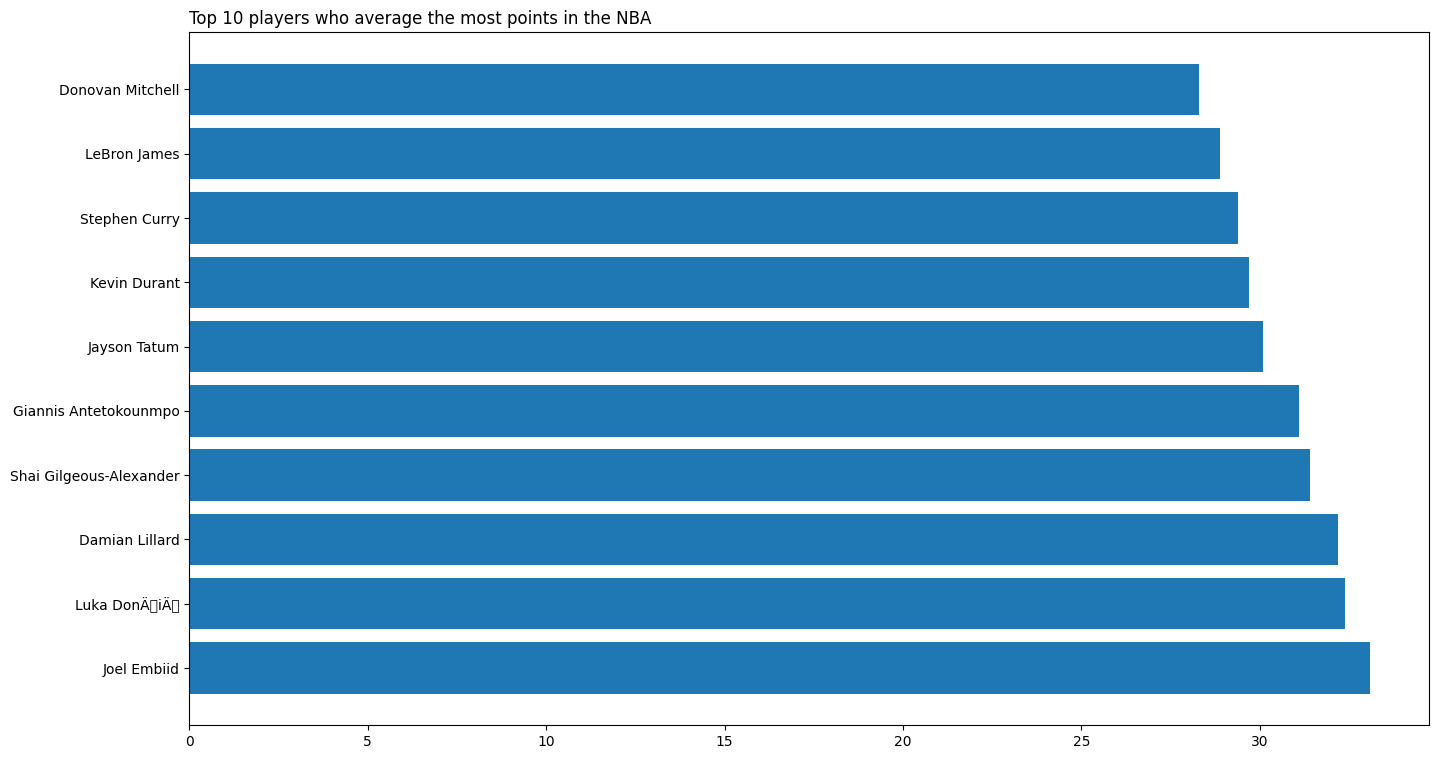

In [38]:
ppg = data.sort_values(by=['PTS'], ascending=False)
player = ppg['Player'].head(11)
points = ppg['PTS'].head(11)

fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(player, points)

ax.set_title('Top 10 players who average the most points in the NBA',
             loc ='left', )

plt.show()

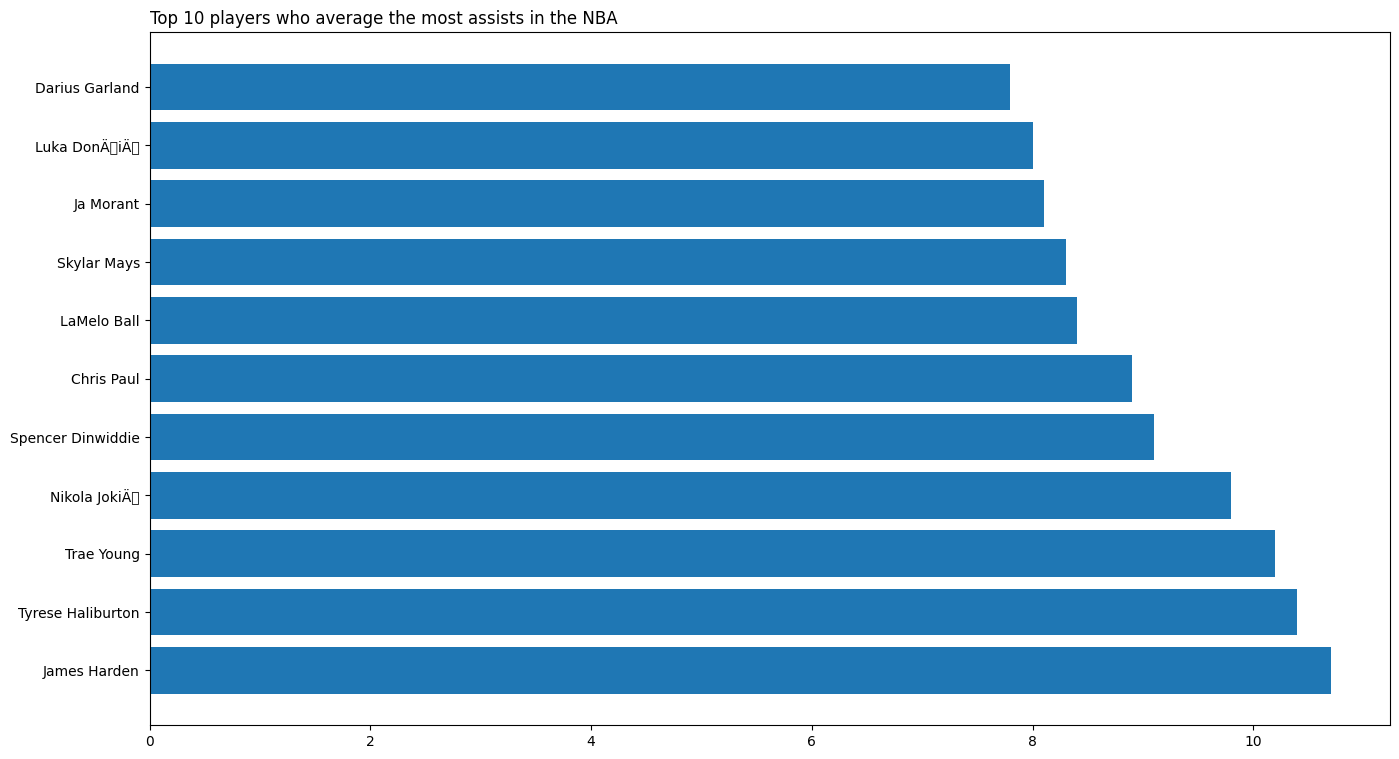

In [39]:
ast_leaders = data.sort_values(by=['AST'], ascending=False)
player = ast_leaders['Player'].head(11)
points = ast_leaders['AST'].head(11)

fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(player, points)

ax.set_title('Top 10 players who average the most assists in the NBA',
             loc ='left', )

plt.show()

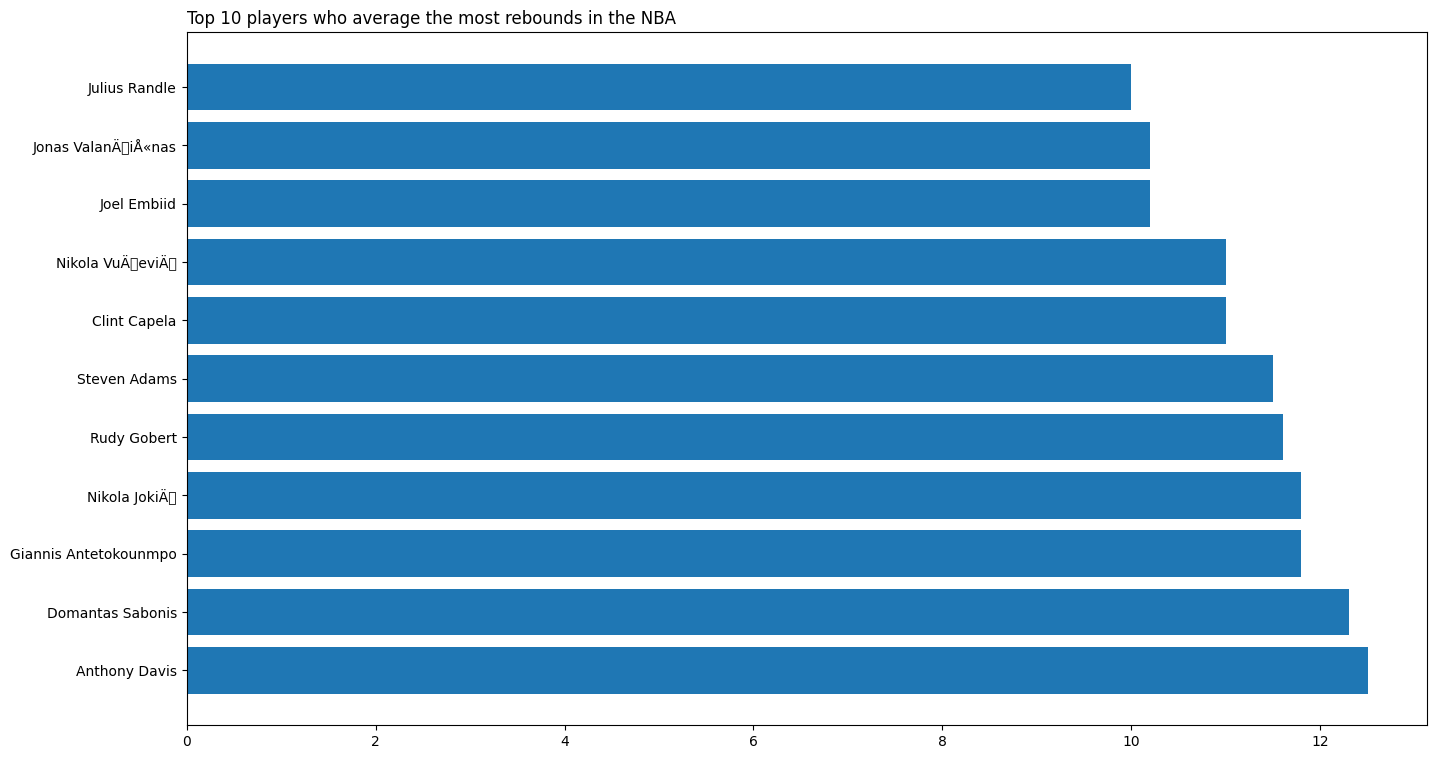

In [40]:
reb_leaders = data.sort_values(by=['TRB'], ascending=False)
player = reb_leaders['Player'].head(11)
points = reb_leaders['TRB'].head(11)

fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(player, points)

ax.set_title('Top 10 players who average the most rebounds in the NBA',
             loc ='left', )

plt.show()